##**Sensing, Perception, and Actuation Course**

**Primary Instructor: Ilya Afanasyev**

**TA: Karam Almaghout**

**Lab 1, 03 Nov. 2022**

### Multi-modal distribution

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns                           # Seaborn is a library for making statistical graphics in Python
from sklearn.neighbors import KernelDensity

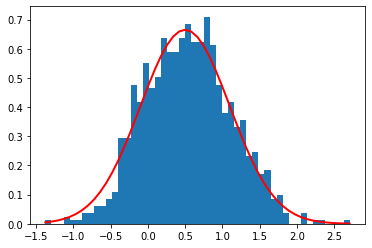

In [6]:
# Plot normal (Gaussian) distribution with numpy.random.normal
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

mu, sigma = 0.5, 0.6 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 50, density=True)    # bins=50 is the number of equal-width bins in the range
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * 
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
               linewidth=2, color='r')
plt.show()

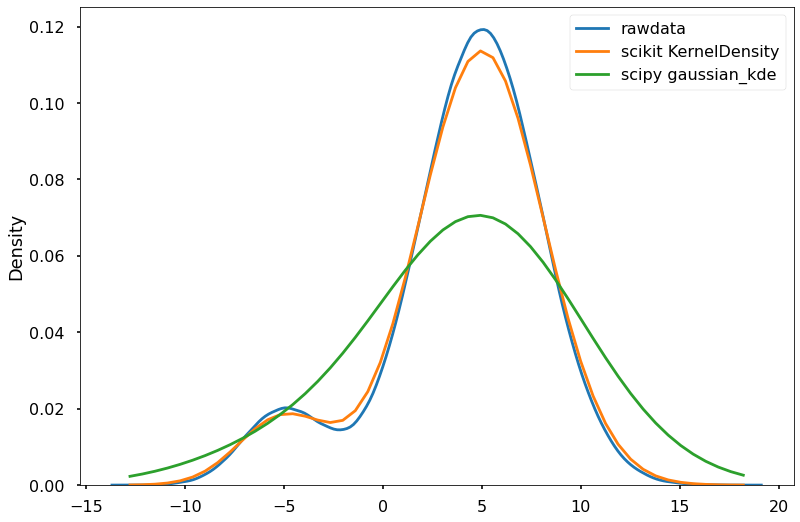

In [32]:
# Kernel Density Estimation using scipy's gaussian_kde and sklearn's KernelDensity 
# https://stackoverflow.com/questions/68396403/kernel-density-estimation-using-scipys-gaussian-kde-and-sklearns-kerneldensity

n = 500000
dist_frac = 0.1
x1 = np.random.normal(-5,2,int(n*dist_frac))      # 1st distribution with mu=-5, sigma=2
x2 = np.random.normal(5,3,int(n*(1-dist_frac)))   # 2nd distribution with mu= 5, sigma=3
x = np.concatenate((x1,x2))                       # concatinate x1 and x2 in one array
eval_points = np.linspace(np.min(x), np.max(x))   # returns evenly spaced numbers over a specified interval

kde_sk = KernelDensity(bandwidth=01.00, kernel='gaussian')    # Kernel Density Estimation with the default bandwidth=1.0
kde_sk.fit(x.reshape([-1,1]))                               # Fits the Kernel Density model on the data
y_sk = np.exp(kde_sk.score_samples(eval_points.reshape(-1,1)))  # Calculates exponential of all elements in the input array

kde_sp = gaussian_kde(x, bw_method=01.0)   # estimates the probability density function (PDF) of a random variable in a non-parametric way
y_sp = kde_sp.pdf(eval_points)       # evaluates the estimated pdf on a provided set of points

sns.kdeplot(x)
plt.plot(eval_points, y_sk)
plt.plot(eval_points, y_sp)
plt.legend(['rawdata','scikit KernelDensity','scipy gaussian_kde'])

### Least Squares Regression

In [19]:
# Least Squares Regression in Python
# https://pythonnumericalmethods.berkeley.edu/notebooks/chapter16.04-Least-Squares-Regression-in-Python.html

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# plt.style.use('seaborn-poster')

In [20]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [21]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T
# turn y into a column vector
y = y[:, np.newaxis]

In [22]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.51281226]
 [1.00508562]]


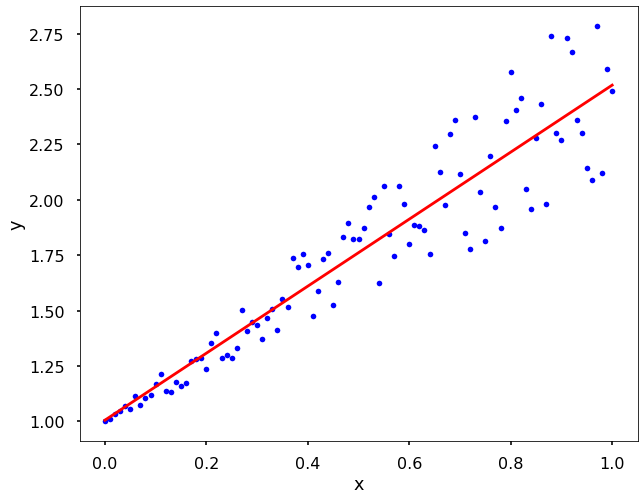

In [23]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[[1.51281226]
 [1.00508562]]


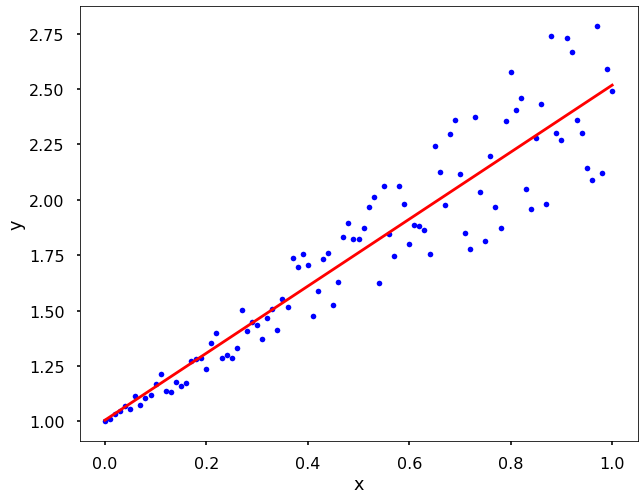

In [24]:
# Use the pseudoinverse

pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[[1.51281226]
 [1.00508562]]


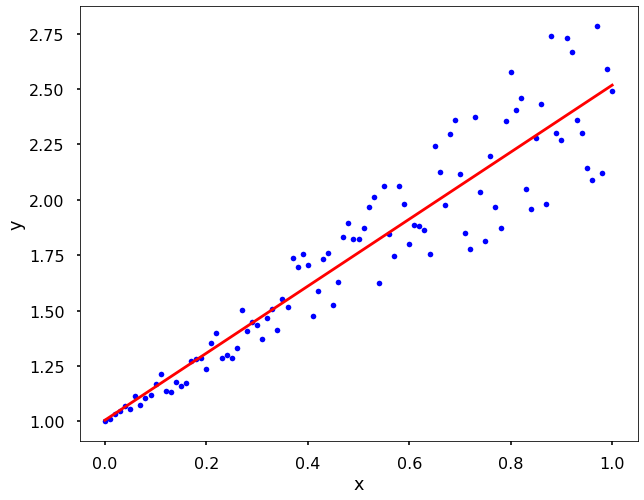

In [25]:
# Use the least square methods (numpy.linalg.lstsq) to get the solution

alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[1.4654489  0.99529543]


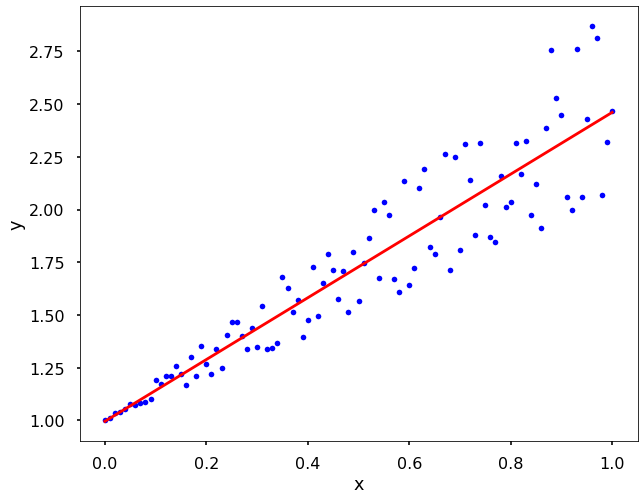

In [26]:
# Use optimize.curve_fit from scipy

# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Outliers

In [17]:
with open('data.txt') as f:
    time=[]
    x_acc=[]
    for line in f:
      data = line.split(',')
      time.append(float(data[0]))
      x_acc.append(float(data[1]))


# display the extracted data
print(time[0:10])
print(x_acc[0:10])
print('data no. samples:' ,len(time))

[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024, 0.028, 0.032, 0.036]
[362.18, 347.67, 297.53, 241.58, 294.2, 176.24, 264.36, 305.98, 302.26, 314.12]
data no. samples: 6500


Dispaly the data

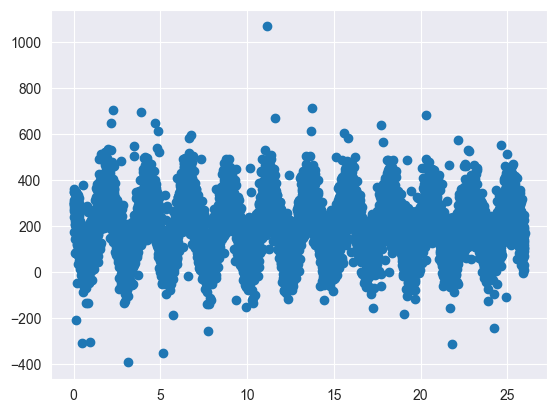

In [8]:
# write your code here
plt.scatter(time, x_acc)
plt.show()

Display the data distribution ( Histogram)

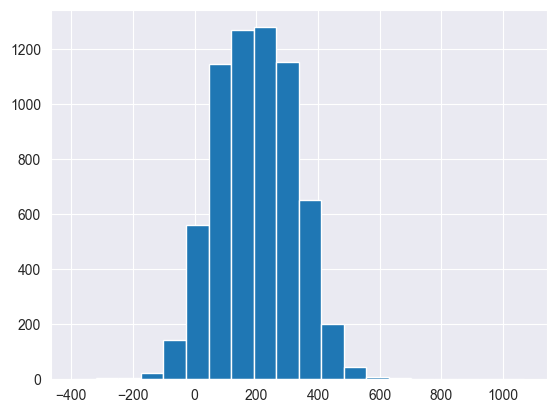

In [11]:
# write your code here
plt.hist(x_acc, bins=20)
plt.show()

Remove the outliers:
1. compute the mean
2. compute the standard deviation
3. use the 2-sigma rule to remove the outliers
4. display the data after removing outliers

In [61]:
# write your code here
x_acc = np.array(x_acc, dtype=float)
x_acc_0 = x_acc[ (x_acc >= x_acc.mean() - 2*x_acc.std() ) & (x_acc <= x_acc.mean() + 2*x_acc.std() ) ]
time = np.asarray(time)
time_0 = time[ (x_acc >= x_acc.mean() - 2*x_acc.std() ) & (x_acc <= x_acc.mean() + 2*x_acc.std() ) ]

In [62]:
x_acc.shape

(6500,)

In [63]:
x_acc_0.shape

(6297,)

In [64]:
len(time)

6500

In [65]:
len(time[:x_acc_0.shape[0]])

6297

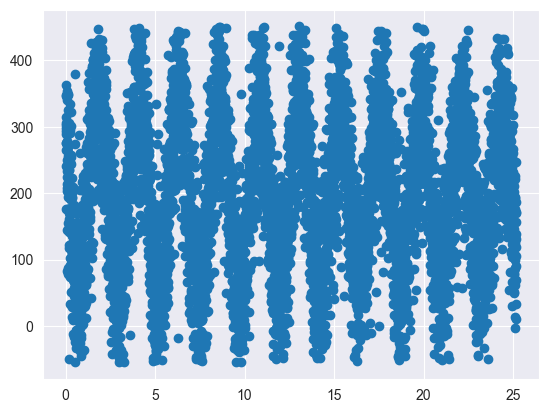

In [66]:
plt.scatter(time[:x_acc_0.shape[0]], x_acc_0)
plt.show()

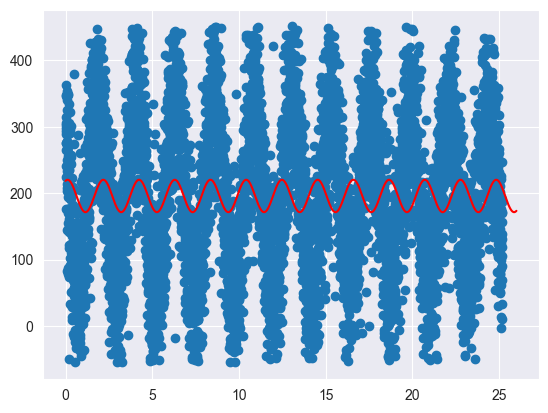

In [76]:
from scipy.optimize import curve_fit

x = time_0
y = x_acc_0

def func(x, a, b, c, d):
    y = a*np.sin(x*b+c) + d
    return y

initial_values = [240,3,0,400]

alpha,_ = curve_fit(func, xdata = x, ydata = y, p0=initial_values)
plt.scatter(time[:x_acc_0.shape[0]], x_acc_0)
plt.plot(time_0, func(time_0, *alpha), color = 'r')
plt.show()

In [ ]:
from scipy.optimize import curve_fit
def cos_to_optimize(x,a,b,c):
    return a*np.cos(b*x) + c
params,_ = curve_fit(cos_to_optimize, x, y)
plt.plot(x,cos_to_optimize(x,*params))

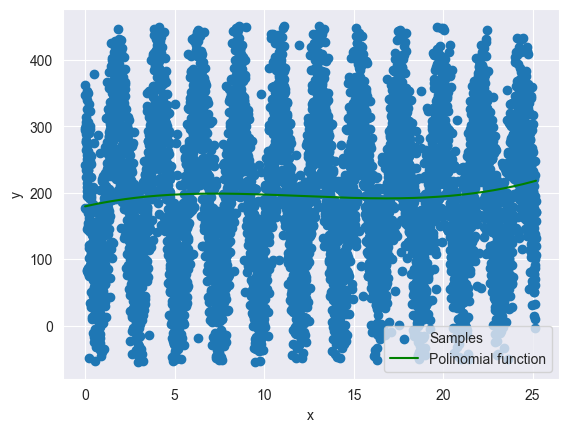

In [44]:
plt.scatter(x, y, label="Samples")
plt.plot(x,y_pred, label="Polinomial function", color = 'g')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()